In [1]:
!pip install sklearn
# used for jyputer notebook is !pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [28]:
# use this if other doesn"t work cause this is universal
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#make imports
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
#scikit imports
from sklearn.model_selection import train_test_split #split data
from sklearn.ensemble import RandomForestClassifier # build model
from sklearn.metrics import classification_report, confusion_matrix #for evaluating the model
from sklearn.preprocessing import LabelEncoder # for encoding categorical features
from sklearn import metrics #for metrics

In [3]:
#read data
coffee_analyze = pd.read_csv("synthetic_coffee_health_10000.csv")
coffee_analyze.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [4]:
#describe the types of dataset for each column
coffee_analyze.dtypes

ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

In [5]:
# is this to check missing values in each column
coffee_analyze.isnull().sum()

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

In [6]:
coffee_analyze.shape

(10000, 16)

In [7]:
# the columns health issue should be dropped because its irrelevant
coffee_analyze.drop(columns=["Health_Issues"], inplace=True)

#check
coffee_analyze.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1


In [8]:
coffee_analyze.shape

(10000, 15)

<Axes: xlabel='Stress_Level', ylabel='count'>

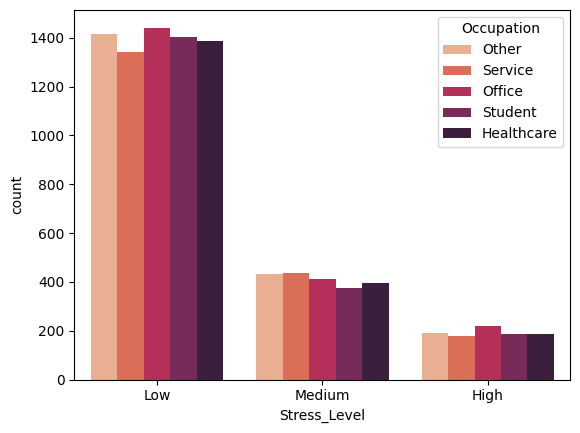

In [9]:
# just practice of creating a plot that answers the assciation of my target and occupation with example
# using a one liner
# this countplot can ask 
# What is the count of people at each stress level distributed across different occupations?
# deep dive could show if certain career paths have effects on stress level
sns.countplot(x="Stress_Level", data=coffee_analyze, hue="Occupation", palette="rocket_r")

In [10]:
# rn the table Stress_Levels is like low medium high so we change to numbers
encoder = LabelEncoder()
coffee_analyze["Stress_Level"] = encoder.fit_transform(coffee_analyze["Stress_Level"])
#now its 0, 1, 2 - low, mid, high
coffee_analyze.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,1,14.5,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,1,11.0,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,2,11.2,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,1,6.6,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,2,8.5,Student,0,1


In [11]:
#FEATURES/PREDICTORS
#gets alls coloumn but my target which are my predictors but Stress_Level as these are the predictor point features
X = coffee_analyze.drop(columns=["Stress_Level"])  
#TARGET
# my target variable is Stress_Level so it will get that
y = coffee_analyze["Stress_Level"]
# turn each column of info into numbers like binary           
X = pd.get_dummies(X, drop_first=True)

In [12]:
X.shape, y.shape

((10000, 38), (10000,))

In [13]:
# this created new binary colums
X.head()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Country_Switzerland,Country_UK,Country_USA,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,1,40,3.5,328.1,7.5,24.9,78,14.5,0,0,...,False,False,False,False,True,False,False,True,False,False
1,2,33,1.0,94.1,6.2,20.0,67,11.0,0,0,...,False,False,False,False,True,False,False,False,True,False
2,3,42,5.3,503.7,5.9,22.7,59,11.2,0,0,...,False,False,False,True,False,False,True,False,False,False
3,4,53,2.6,249.2,7.3,24.7,71,6.6,0,0,...,False,False,False,False,True,False,False,True,False,False
4,5,32,3.1,298.0,5.3,24.1,76,8.5,0,1,...,False,False,False,True,False,False,False,False,False,True


In [14]:
# train 
# this uses the from sklearn.model_selection import train_test_split import
# split data into training and testing sets
# 80% train
# 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# shows the size by colums and rows of how much is being trained
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 38), (2000, 38), (8000,), (2000,))

In [16]:
#define and set the random forest model
# it will create 100 decision trees for the random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#train it
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# make predictions using the random forest model
y_predictions = rf_model.predict(X_test)

# Show classifications on the 20% tested data.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predictions))

# Show details like metrics like Precision, Recall, and F1-Score, Tests for each category.
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_predictions))


Confusion Matrix:
[[ 190    0    0]
 [   0 1435    0]
 [   0    0  375]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00      1435
           2       1.00      1.00      1.00       375

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



/var/folders/1n/fmhnp8fd7r123s2x1vshzw0h0000gn/T/ipykernel_30356/3036850055.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


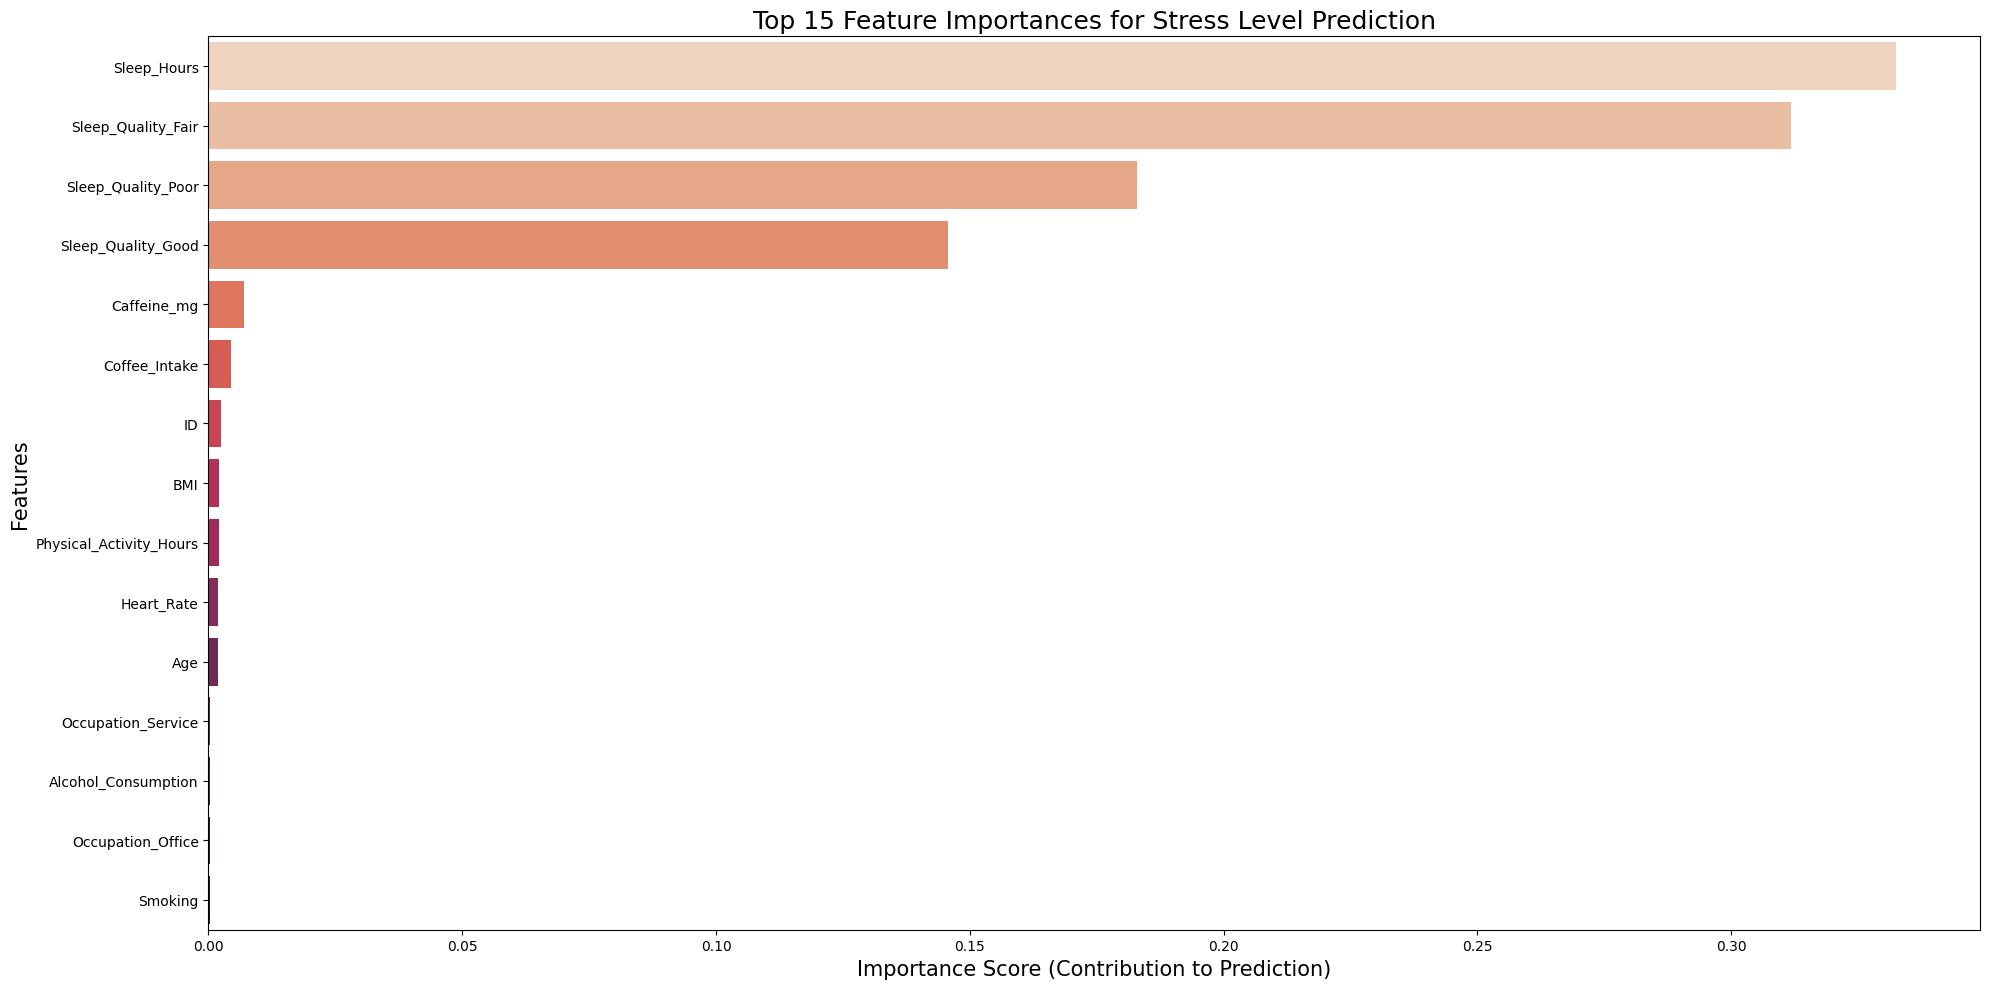

In [18]:
# Find feature importance from the random forest
fimportance = rf_model.feature_importances_ 
fimportance = pd.Series(data = fimportance, index = X_train.columns) 
fimportance.sort_values(ascending=False, inplace=True) 

# create bar plot
plt.figure(figsize=(20, 10))
fimportance_top = fimportance.head(15)

# Generate the horizontal bar plot
sns.barplot(
    x=fimportance_top.values, 
    y=fimportance_top.index, 
    palette=sns.color_palette("rocket_r", n_colors=15), 
)

plt.title(f"Top 15 Feature Importances for Stress Level Prediction", fontsize=18)
plt.xlabel("Importance Score (Contribution to Prediction)", fontsize=15)
plt.ylabel("Features", fontsize=15)

plt.tight_layout()
plt.show()


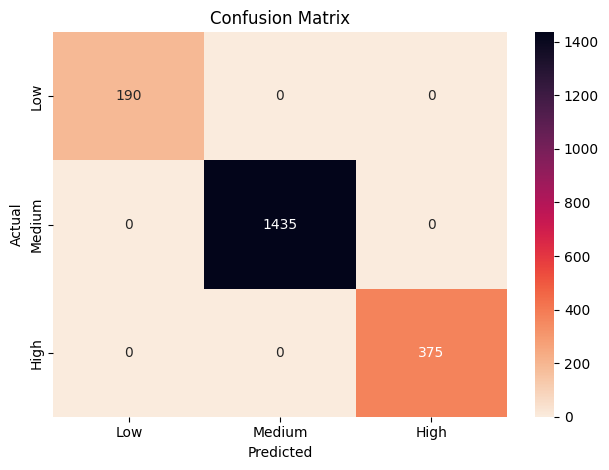

In [19]:
#HEATMAP OF CONFUSION MATRIX
cm = confusion_matrix(y_test, y_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

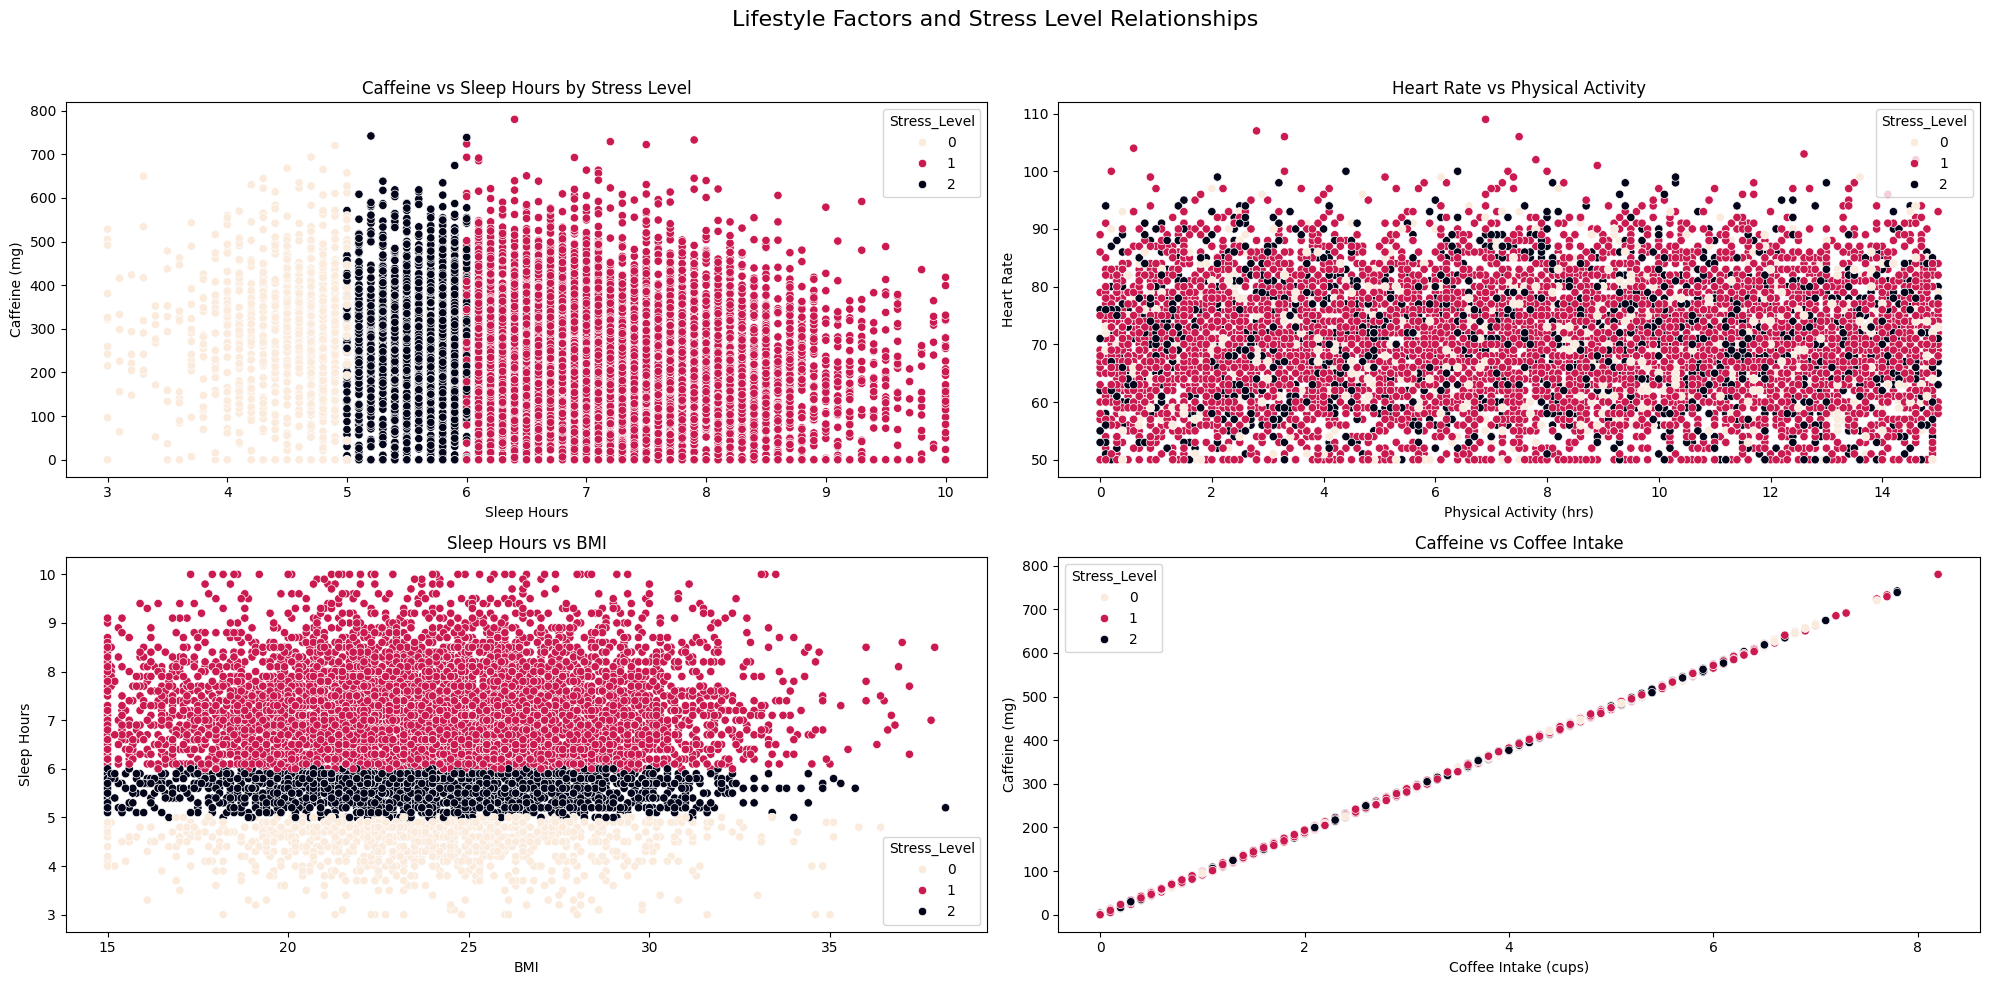

In [20]:
#CREATE 4 PLOTS IN 1
#2 by 2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

# Plot 1: Sleep Hours vs Caffeine Intake
sns.scatterplot(x="Sleep_Hours", y="Caffeine_mg", hue="Stress_Level", data=coffee_analyze, palette="rocket_r", ax=ax1)
ax1.set_title("Caffeine vs Sleep Hours by Stress Level")
ax1.set_xlabel("Sleep Hours")
ax1.set_ylabel("Caffeine (mg)")

# Plot 2: Physical Activity vs Heart Rate
sns.scatterplot(x="Physical_Activity_Hours", y="Heart_Rate", hue="Stress_Level", data=coffee_analyze, palette="rocket_r", ax=ax2)
ax2.set_title("Heart Rate vs Physical Activity")
ax2.set_xlabel("Physical Activity (hrs)")
ax2.set_ylabel("Heart Rate")

# Plot 3: BMI vs Sleep Hours
sns.scatterplot(x="BMI", y="Sleep_Hours", hue="Stress_Level", data=coffee_analyze, palette="rocket_r", ax=ax3)
ax3.set_title("Sleep Hours vs BMI")
ax3.set_xlabel("BMI")
ax3.set_ylabel("Sleep Hours")

# Plot 4: Coffee Intake vs Caffeine
sns.scatterplot(x="Coffee_Intake", y="Caffeine_mg", hue="Stress_Level", data=coffee_analyze, palette="rocket_r", ax=ax4)
ax4.set_title("Caffeine vs Coffee Intake")
ax4.set_xlabel("Coffee Intake (cups)")
ax4.set_ylabel("Caffeine (mg)")

# Final layout tweaks
plt.suptitle("Lifestyle Factors and Stress Level Relationships", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
